In [1]:
import numpy as np
from astropy.io import fits
from marvin.tools import Maps
import marvin.utils.plot.colorbar as colorbar
from tqdm import tqdm
import matplotlib.pyplot as plt
#from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import scipy as scipy
from scipy.fft import fft
from scipy import ndimage

import multiprocessing as mp
from multiprocessing import Pool
import copy

import Simpler_Classifier

from importlib import reload 


[INFO]: No release version set. Setting default to DR17
[WARNING]: path /Users/runquanguan/sas/mangawork/manga/spectro/redux/v3_1_1/drpall-v3_1_1.fits cannot be found. Setting drpall to None. (MarvinUserWarning)
[WARNING]: path /Users/runquanguan/sas/mangawork/manga/spectro/analysis/v3_1_1/3.1.0/dapall-v3_1_1-3.1.0.fits cannot be found. Setting dapall to None. (MarvinUserWarning)
[WARNING]: Passing field metadata as keyword arguments is deprecated. Use the explicit `metadata=...` argument instead. Additional metadata: {'location': 'view_args'} (RemovedInMarshmallow4Warning)
[WARNING]: The 'missing' argument to fields is deprecated. Use 'load_default' instead. (RemovedInMarshmallow4Warning)


In [5]:
my_module = reload(Simpler_Classifier) # reload of Simpler_Classifier without restart

In [24]:
data = '7990-3702'

maps = Maps(data, bintype='SPX', template='MILESHC-MASTARSSP')

phi = maps.spx_ellcoo_elliptical_azimuth.value #.round(decimals=2)
r_re = maps.spx_ellcoo_r_re.value
oiii_ew = Simpler_Classifier.ew_washing(data, snr=3)


r_max = r_re.max()

In [53]:
# Discrete Integration

from scipy import interpolate

x = r_re.flatten()
y = phi.flatten()
z = oiii_ew.flatten()
f = interpolate.interp2d(x, y, z, kind='linear')



xnew = np.linspace(0, r_max, 1000)
ynew = np.linspace(0, 360, 1000)
znew = f(xnew, ynew)


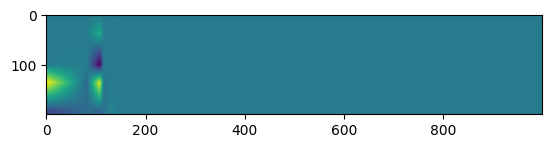

In [56]:
plt.imshow(znew[0:200])
plt.show()

In [2]:
HEADER_PATH = '/Users/runquanguan/Documents/dapall_excluded.fits'
hdul = fits.open(HEADER_PATH)
hdu = hdul[1].data
plateifu = hdu['PLATEIFU']


def selector(data):
    if len(data) >= 4:
        try:
            curve = Simpler_Classifier.integra_r_dir(data)
            result = Simpler_Classifier.fourier_classifier(curve)

            if result[1][1] == 3 and result[4] <= 30:
                return data
            else:
                pass
        except:
            pass
    else:
        pass

In [3]:
if __name__ == '__main__':
    pool = mp.Pool(processes=6)

    results = []
    for result in pool.imap_unordered(selector, plateifu):
        results.append(result)
    
    pool.close()
    pool.join() 
    #print(results)

[WARNING]: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray. (VisibleDeprecationWarning)
[WARNING]: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray. (VisibleDeprecationWarning)
[WARNING]: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray. (VisibleDeprecationWarning)
[WARNING]: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. 

In [4]:
c1 = fits.Column(name='plateifu', array=np.array(results), format='20A')
t = fits.BinTableHDU.from_columns([c1])
t.writeto('simpler_FULL_AUTO_v1.fits')

In [6]:
result_copy = copy.deepcopy(results)

In [7]:
result_count = []
for i in result_copy:
    if i != None:
        result_count.append(i)
    else:
        pass

In [8]:
len(result_count)
#list(plateifu)

1615

In [20]:
for data in list(plateifu):
    if data in result_count:
        pass
    else:
        curve = Simpler_Classifier.integra_r_dir(data)
        result = Simpler_Classifier.fourier_classifier(curve)
        Simpler_Classifier.plot_something(data)


DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:Local mode failed.  Trying remote.
[WARNING]: subprocess 71923 is still running (ResourceWarning)
  ResourceWarning, source=self)

DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:Local mode failed.  Trying remote.
[WARNING]: subprocess 71931 is still running (ResourceWarning)
  ResourceWarning, source=self)

DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:Local mode failed.  Trying remote.
[WARNING]: subprocess 71938 is still running (ResourceWarning)
  ResourceWarning, source=self)

DEBUG:m

DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:Local mode failed.  Trying remote.
[WARNING]: subprocess 72029 is still running (ResourceWarning)
  ResourceWarning, source=self)

DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:Local mode failed.  Trying remote.
[WARNING]: subprocess 72037 is still running (ResourceWarning)
  ResourceWarning, source=self)

DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:Local mode failed.  Trying remote.
[WARNING]: subprocess 72042 is still running (ResourceWarning)
  ResourceWarning, source=self)

DEBUG:m

data = '7990-3702'
curve = Simpler_Classifier.integra_r_dir(data, dphi = 5, snr = 10)
result = Simpler_Classifier.fourier_classifier(curve)

fig = plt.figure(figsize=(10, 5))
fig.add_subplot(1, 2, 1)
plt.plot(curve)
fig.add_subplot(1, 2, 2)
plt.plot(result[0])
plt.show()
plt.clf()

In [63]:
plt.clf()

# Plot result

In [57]:
HEADER_PATH2 = '/Users/runquanguan/Documents/simpler_FULL_AUTO_v1.fits'
hdul2 = fits.open(HEADER_PATH2)
hdu2 = hdul2[1].data
plateifu2 = hdu2['PLATEIFU']



In [71]:
review = []
for i in plateifu2:
    if len(i) >= 6:
        review.append(i)

In [58]:
rand = np.random.randint(1615, size=30)

In [72]:
len(review)

1615

In [75]:
def rand_check(randseed):
    plateifu = review[randseed]
    print(plateifu)
    Simpler_Classifier.plot_something(plateifu)

In [76]:
for i in rand:
    rand_check(i)

9025-6103


[WARNING]: subprocess 76439 is still running (ResourceWarning)


11984-6103


[WARNING]: subprocess 76448 is still running (ResourceWarning)


8597-1901


[WARNING]: subprocess 76455 is still running (ResourceWarning)


8977-3704


[WARNING]: subprocess 76462 is still running (ResourceWarning)


12510-12701


[WARNING]: subprocess 76469 is still running (ResourceWarning)


9507-9102


[WARNING]: subprocess 76474 is still running (ResourceWarning)


10837-3701


[WARNING]: subprocess 76482 is still running (ResourceWarning)


9510-6102


[WARNING]: subprocess 76497 is still running (ResourceWarning)


8600-3704


[WARNING]: subprocess 76505 is still running (ResourceWarning)


9034-6101


[WARNING]: subprocess 76512 is still running (ResourceWarning)


8093-6103


[WARNING]: subprocess 76518 is still running (ResourceWarning)


9867-9102


[WARNING]: subprocess 76524 is still running (ResourceWarning)


8713-3703


[WARNING]: subprocess 76530 is still running (ResourceWarning)


8941-6102


[WARNING]: subprocess 76537 is still running (ResourceWarning)


8600-3702


[WARNING]: subprocess 76545 is still running (ResourceWarning)


8626-6104


[WARNING]: subprocess 76553 is still running (ResourceWarning)


9002-1901


[WARNING]: subprocess 76560 is still running (ResourceWarning)


8324-6103


[WARNING]: subprocess 76567 is still running (ResourceWarning)


11941-6103


[WARNING]: subprocess 76575 is still running (ResourceWarning)


8947-12702


[WARNING]: subprocess 76582 is still running (ResourceWarning)


10510-9102


[WARNING]: subprocess 76588 is still running (ResourceWarning)


9034-6101


[WARNING]: subprocess 76594 is still running (ResourceWarning)


7961-12701


[WARNING]: subprocess 76601 is still running (ResourceWarning)


11967-3703


[WARNING]: subprocess 76606 is still running (ResourceWarning)


7981-12703


[WARNING]: subprocess 76613 is still running (ResourceWarning)


8247-1901


[WARNING]: subprocess 76619 is still running (ResourceWarning)


9891-1901


[WARNING]: subprocess 76626 is still running (ResourceWarning)


10503-12704


[WARNING]: subprocess 76632 is still running (ResourceWarning)


12621-12703


[WARNING]: subprocess 76638 is still running (ResourceWarning)


8618-9101


[WARNING]: subprocess 76644 is still running (ResourceWarning)


if __name__ == '__main__':
    pool = Pool()
    pool.map(rand_check, rand)